In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate dataset

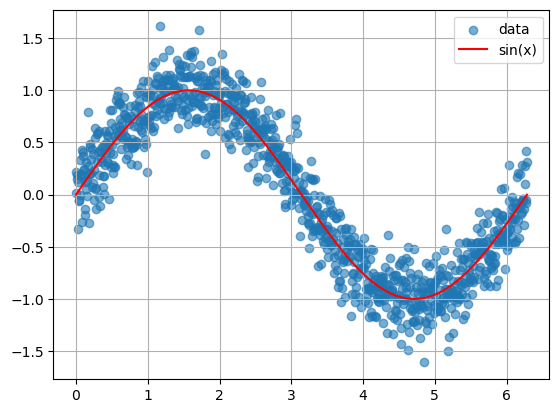

In [8]:
N = 1000 # number of data points

X = np.linspace(0,2*np.pi,N)
y = np.sin(X)
y = y + 0.2*np.random.normal(0,1,N)

plt.scatter(X,y,label='data',alpha=0.6)
plt.plot(X,np.sin(X),color='red',label='sin(x)')
plt.legend()
plt.grid()

## Ridge Regression

In [29]:
lam = 1 # regularization parameter
Phi = np.hstack([X[:,None], np.ones((N,1))])

beta = np.linalg.solve(Phi @ Phi.T + lam*np.eye(N), y)
w_ridge = Phi.T @ beta

y_ridge = Phi @ w_ridge

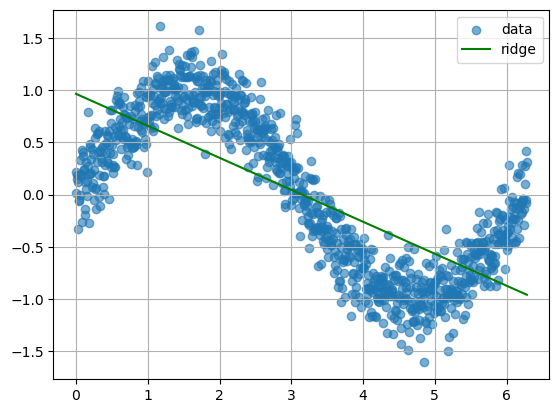

In [30]:
plt.scatter(X,y,label='data',alpha=0.6)
plt.plot(X,y_ridge,color='green',label='ridge')
plt.legend()
plt.grid()

## Kernel Regression

In [64]:
def gauss_kernel(xi,xj):
    sigma = 1
    return np.exp(-np.linalg.norm(xi-xj)**2/(2*sigma**2))

def poly_kernel(xi,xj):
    return (1+xi*xj)**4

In [65]:
K_gauss = np.array([[gauss_kernel(X[i],X[j]) for i in range(N)] for j in range(N)])
K_poly = np.array([[poly_kernel(X[i],X[j]) for i in range(N)] for j in range(N)])

beta_gauss = np.linalg.solve(K_gauss + lam*np.eye(N), y)
beta_poly = np.linalg.solve(K_poly + lam*np.eye(N), y)

y_gauss = K_gauss @ beta_gauss
y_poly = K_poly @ beta_poly

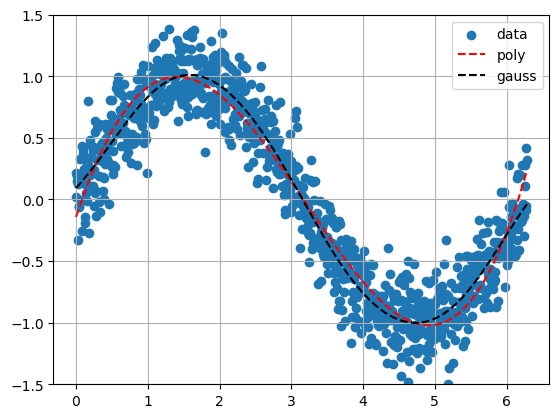

In [66]:
plt.scatter(X,y,label='data')
plt.plot(X,y_poly,'--',color='red',label='poly')
plt.plot(X,y_gauss,'--',color='black',label='gauss')
plt.legend()
plt.ylim(-1.5,1.5)
plt.grid()

## Scikit-learn Kernel Regression

In [67]:
from sklearn.kernel_ridge import KernelRidge

In [68]:
kernel_ridge = KernelRidge(alpha=lam,kernel='rbf',gamma=1)
kernel_ridge.fit(X[:,None],y)

KernelRidge(gamma=1, kernel='rbf')

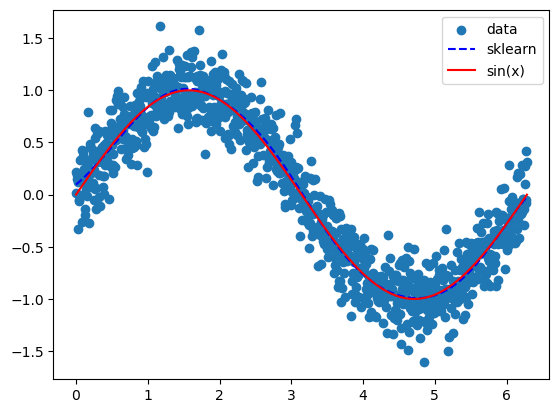

In [69]:
y_sklearn = kernel_ridge.predict(X[:,None])

plt.scatter(X,y,label='data')
plt.plot(X,y_sklearn,'--',color='blue',label='sklearn')
plt.plot(X,np.sin(X),color='red',label='sin(x)')
plt.legend()